In [1]:
#Loading necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load the Data
data = pd.read_csv("Advertising.csv", )
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data_1 = data.copy()
data_1.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data_1.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data_1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Simple Linear Regression

In [64]:
#Initializing the variables
X = data_1['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
y = y*100

In [65]:
X.shape, y.shape

((200, 1), (200, 1))

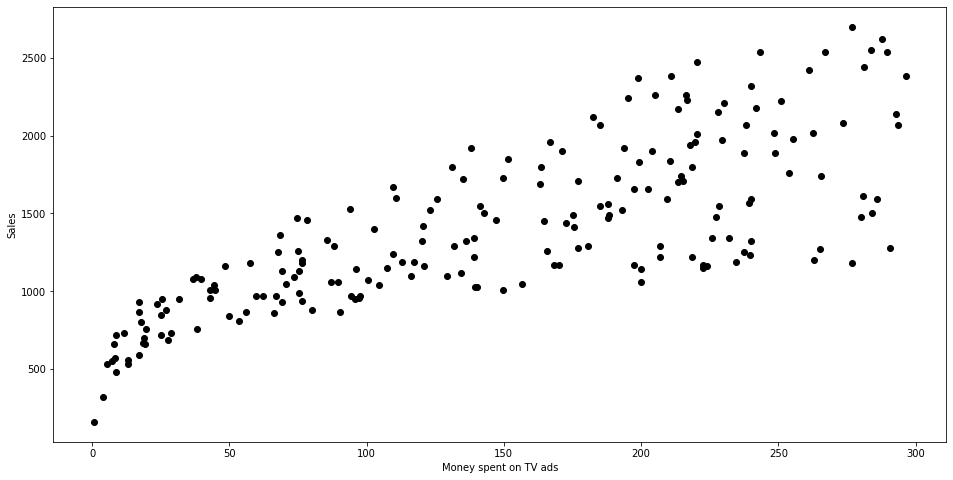

In [66]:
#Plotting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Money spent on TV ads")
plt.ylabel('Sales')
plt.show()

In [67]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,)

model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

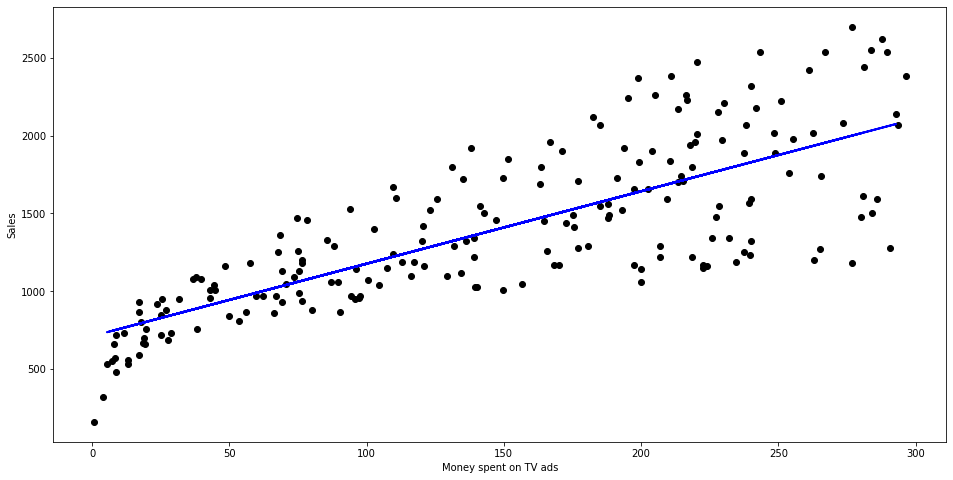

In [70]:
plt.figure(figsize=(16,8))
plt.scatter(X,y, c="black")
plt.plot(
        X_test,
        y_pred,
        c="blue",
        linewidth=2)

plt.xlabel("Money spent on TV ads")
plt.ylabel('Sales')
plt.show()

In [71]:
model.coef_

array([[4.65297337]])

In [72]:
model.intercept_

array([711.96384306])

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627077

In [75]:
output = model.predict([[230.1]])
output

array([[1782.61301562]])

# Multiple Regression

In [76]:
X = data_1.drop(['Sales'], axis=1)
y = data_1['Sales'].values.reshape(-1,1)
y = y*100

In [77]:
y

array([[2210.],
       [1040.],
       [ 930.],
       [1850.],
       [1290.],
       [ 720.],
       [1180.],
       [1320.],
       [ 480.],
       [1060.],
       [ 860.],
       [1740.],
       [ 920.],
       [ 970.],
       [1900.],
       [2240.],
       [1250.],
       [2440.],
       [1130.],
       [1460.],
       [1800.],
       [1250.],
       [ 560.],
       [1550.],
       [ 970.],
       [1200.],
       [1500.],
       [1590.],
       [1890.],
       [1050.],
       [2140.],
       [1190.],
       [ 960.],
       [1740.],
       [ 950.],
       [1280.],
       [2540.],
       [1470.],
       [1010.],
       [2150.],
       [1660.],
       [1710.],
       [2070.],
       [1290.],
       [ 850.],
       [1490.],
       [1060.],
       [2320.],
       [1480.],
       [ 970.],
       [1140.],
       [1070.],
       [2260.],
       [2120.],
       [2020.],
       [2370.],
       [ 550.],
       [1320.],
       [2380.],
       [1840.],
       [ 810.],
       [2420.],
       [

In [78]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = model_1.predict(X_test)

In [87]:
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [89]:
multiple_reg.intercept_

array([297.90673381])

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

In [84]:
print("Enter the amount you will invest")
tv = float(input("TV: "))
radio = float(input("Radio: "))
newspaper = float(input("News Paper"))

output = model_1.predict([[tv, radio, newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on Tv, Rs{} on radio, Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable", tv, radio, newspaper))

Enter the amount you will invest
TV: 100
Radio: 100
News Paper100
you will get Rs2664.76 sales by advertising Rs100.0 on Tv, Rs100.0 on radio, Rs100.0 on newspaper.


In [92]:
#Saving the model
import pickle
import os
if not os.path.exists('models'):
    os.makedirs('models')

MODEL_PATH = 'models/multiple_reg.sav'
pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))